In [4]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
from hmmlearn import hmm

In [7]:
from scipy.io import wavfile

In [8]:
rate, afrikaans1 = wavfile.read('./archive/wav/afrikaans1.wav')

In [10]:
rate, afrikaans2 = wavfile.read('./archive/wav/afrikaans2.wav')
rate, afrikaans3 = wavfile.read('./archive/wav/afrikaans3.wav')

In [11]:
rate, arabic1 = wavfile.read('./archive/wav/arabic1.wav')
rate, arabic2 = wavfile.read('./archive/wav/arabic2.wav')
rate, arabic3 = wavfile.read('./archive/wav/arabic3.wav')

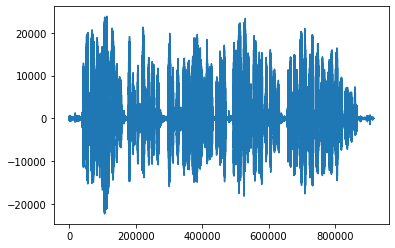

In [12]:
plt.plot(afrikaans1)

In [17]:
import python_speech_features as features

In [28]:
mfcc_af1 = features.mfcc(afrikaans1)
mfcc_af2 = features.mfcc(afrikaans2)
mfcc_af3 = features.mfcc(afrikaans3)
mfcc_ar1 = features.mfcc(arabic1)
mfcc_ar2 = features.mfcc(arabic2)
mfcc_ar3 = features.mfcc(arabic3)

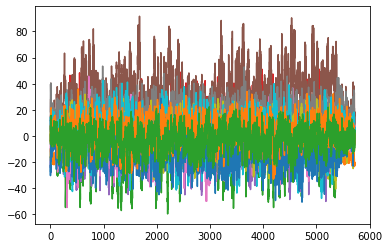

In [20]:
plt.plot(mfcc_af1);

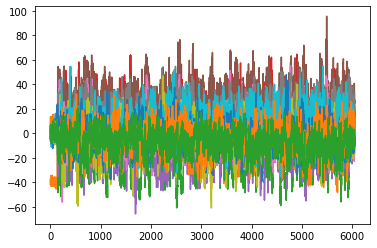

In [22]:
plt.plot(mfcc_af2);

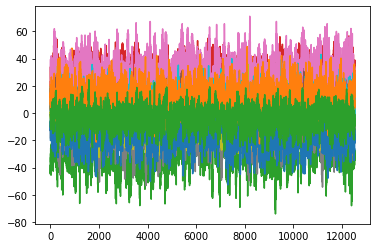

In [29]:
plt.plot(mfcc_ar1);

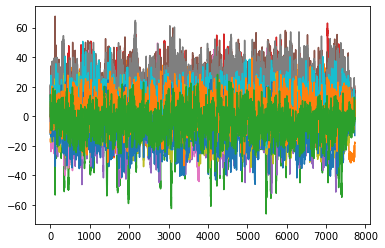

In [30]:
plt.plot(mfcc_ar2);

In [31]:
import os

In [32]:
class MakeMarkov:
    
    def __init__(self, n_components = 3):
        self.n_components = n_components
        self.model = hmm.GaussianHMM(n_components=self.n_components)
        
    def train(self, X):
        self.fit_model = self.model.fit(X)
        return self.fit_model
    
    def score(self, X):
        return self.model.score(X)

In [59]:
files = [afrikaans1, afrikaans2, arabic1, arabic2]

In [60]:
hmm_models = []
labels = ['afrikaans', 'afrikaans', 'arabic', 'arabic']
for file in files:
    mfcc_features = features.mfcc(file)
    model = MakeMarkov()
    model.train(mfcc_features)
    hmm_models.append(model)

In [36]:
hmm_models

In [55]:
scores = [model.score(mfcc_af3) for model in hmm_models]

In [56]:
max(scores)

-371273.8744163195

In [57]:
labels[scores.index(max(scores))]

'afrikaans'

In [61]:
scores2 = [model.score(mfcc_ar3) for model in hmm_models]

In [62]:
labels[scores2.index(max(scores2))]

'arabic'